In [47]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy
import math
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_csv('titanic_dataset.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
titanic_ship = pd.read_csv("titanic_dataset.csv", index_col='PassengerId', usecols=['PassengerId','Pclass','Survived'])
titanic_ship

,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3
...,...,...
887,0,2
888,1,1
889,0,3


C:\Users\admin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

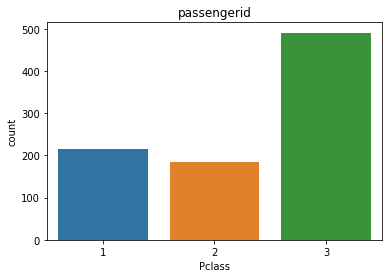

In [49]:
sns.countplot(titanic_ship.Pclass)
plt.title("passengerid")
plt.show


C:\Users\admin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

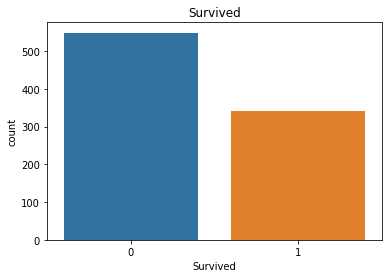

In [50]:
sns.countplot(titanic_ship.Survived)
plt.title("Survived")
plt.show

In [51]:
PClass_survd = pd.pivot_table(titanic_ship,index=['Pclass'],columns=['Survived'],aggfunc='size')
PClass_survd

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [52]:
pclass = PClass_survd.sum(axis=1)/891
pclass

Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64

In [53]:
p_survived = PClass_survd.sum(axis=0)/891
p_survived

Survived
0    0.616162
1    0.383838
dtype: float64

In [54]:
new = pclass.to_frame()@(p_survived.to_frame().T)
new

Survived,0,1
Pclass,,
1,0.149373,0.093052
2,0.127243,0.079266
3,0.339546,0.211520


In [55]:
new1 = round(new*891)
new1

Survived,0,1
Pclass,,
1,133.0,83.0
2,113.0,71.0
3,303.0,188.0


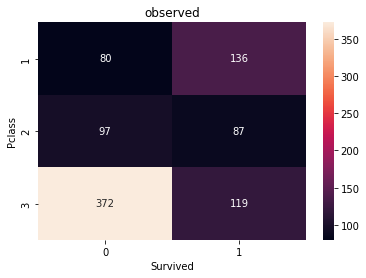

In [58]:
sns.heatmap(PClass_survd,annot=True,fmt='.3g')
plt.title('observed')
plt.show()

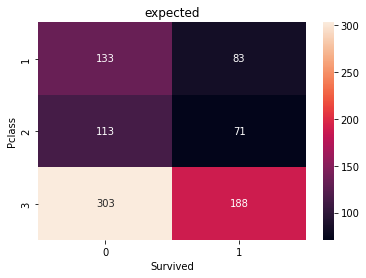

In [59]:
sns.heatmap(new1,annot=True,fmt='.3g')
plt.title('expected')
plt.show()


In [76]:
chi_table = (( PClass_survd-new1 )**2)/new1
chi_table



Survived,0,1
Pclass,,
1,21.120301,33.843373
2,2.265487,3.605634
3,15.712871,25.324468


In [79]:
from scipy.stats.distributions import chi2

chi_value =chi_table.sum().sum()

p_value = chi2.sf(chi_value,1)

print("Chi square value is ",chi_value)
print("P value is",p_value)

Chi square value is  101.87213414657131
P value is 5.9223796800860216e-24
